# Building Regression Model

<font size = '5'>Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

<font size='5'> Load the Dataset

In [24]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [25]:
# Convert to pandas DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target # Adding the target variable

<font size='5'>Explore the Data

In [18]:
# View the first few rows of the data
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [19]:
# Summary statistics
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

F:\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


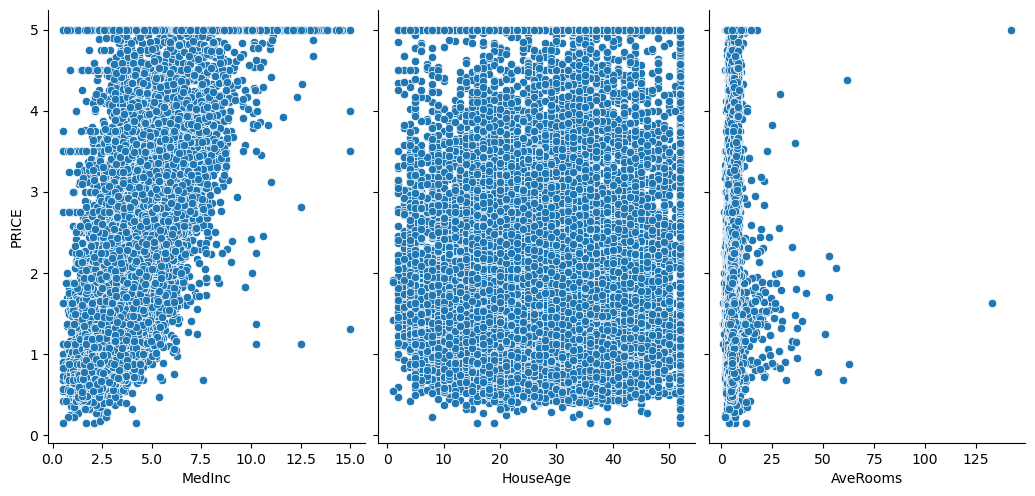

In [27]:
# Visualize the relationship between features and target variable
sns.pairplot(df, x_vars=['MedInc', 'HouseAge', 'AveRooms'], y_vars='PRICE', height=5, aspect=0.7)
plt.show()

<font size='5'>Prepare the Data

In [28]:
# Select the features (independent variables) and target (dependent variable)
X = df[['MedInc', 'HouseAge', 'AveRooms']]
y = df['PRICE']

In [29]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font size='5'>Build the Model

In [30]:
# Create a linear regression model
model = LinearRegression()

In [31]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

<font size='5'>Make Predictions

In [32]:
# Make predictions on the test data
y_pred = model.predict(X_test)

<font size='5'>Evaluate the Model

In [33]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [34]:
# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

In [35]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.6589108649336336
R-squared: 0.49717158850807075


<font size='5'>Visualize the Results

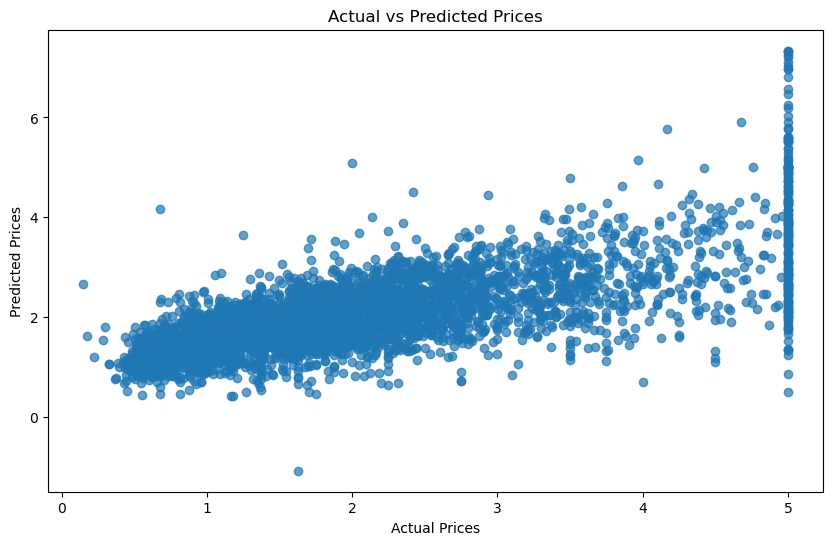

In [37]:
# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

<font size='5'>Interpretation of Results:
- Mean Squared Error (MSE): A measure of how much the predictions deviate from the actual
values. Lower values indicate better fit.
- R-squared: Represents the proportion of the variance in the dependent variable that is
predictable from the independent variables. Values closer to 1 indicate a better fit.